# Predicting car price using LinearRegression¶

## Case 3 : Applying LabelEncoder() on categorial variables and considering strong features whose R value close to 1

### model performance good on both train as well as  test set

In [167]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
%matplotlib inline

In [171]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=0)

In [172]:
features = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [173]:
data.columns = features

In [174]:
data.shape

(204, 26)

In [175]:
data.index[data.price=='?']

Int64Index([8, 43, 44, 128], dtype='int64')

In [176]:
data.drop(data.index[data.price=='?'],axis=0,inplace=True)

In [177]:
data.replace('?',np.NaN,inplace=True)

In [178]:
to_float_cols = ['normalized_losses','curb_weight','engine_size','bore','stroke','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [179]:
for c in to_float_cols:
    data[c] = data[[c]].apply(pd.to_numeric,axis=1,errors='coerce')

In [180]:
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [181]:
data = data.apply(LabelEncoder().fit_transform)

In [182]:
data.describe()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.830000,27.075000,12.360000,0.900000,0.180000,0.425000,2.630000,1.330000,0.015000,22.415000,...,16.595000,3.250000,18.215000,19.465000,14.080000,24.450000,11.270000,12.095000,13.310000,89.695000
std,1.248557,14.317273,6.207501,0.300753,0.385152,0.495584,0.846572,0.550103,0.121857,13.596954,...,10.710019,2.014395,10.082513,8.612179,7.073455,15.035553,5.055183,6.121547,5.943951,53.347651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,14.750000,8.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,10.000000,...,7.750000,1.000000,11.000000,13.750000,9.750000,10.000000,8.000000,6.000000,8.000000,44.000000
50%,3.000000,30.000000,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,21.000000,...,14.500000,5.000000,16.000000,21.000000,13.000000,23.000000,11.500000,11.000000,13.000000,87.500000
75%,4.000000,41.000000,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,33.000000,...,24.250000,5.000000,28.250000,25.000000,18.000000,34.000000,16.000000,17.000000,17.000000,135.250000
max,5.000000,50.000000,21.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,51.000000,...,42.000000,7.000000,37.000000,35.000000,31.000000,57.000000,21.000000,28.000000,29.000000,184.000000


C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


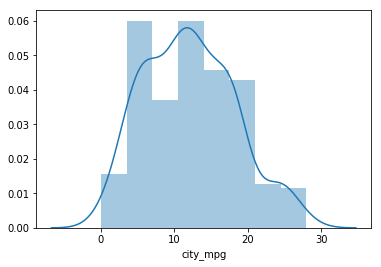

In [183]:
sns.distplot( data.city_mpg )

In [184]:
data.price.corr( data.fuel_system )

0.706248126364332

C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Satish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


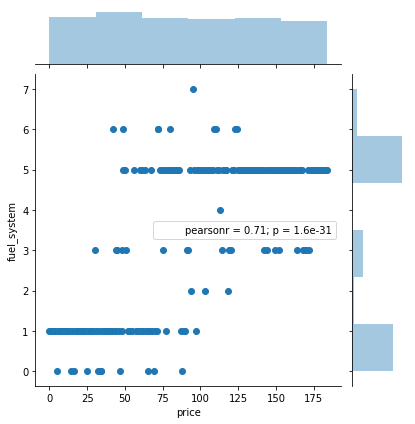

In [185]:
sns.jointplot( data.price , data.fuel_system )

In [186]:
data.corr(method='pearson', min_periods=1)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.456117,-0.114606,0.195381,-0.050995,0.669595,-0.592275,-0.064238,0.215014,-0.531886,...,-0.108893,0.084915,-0.096877,0.012529,-0.058766,0.052546,0.285966,-0.043899,0.025419,-0.094106
normalized_losses,0.456117,1.000000,-0.347416,0.063602,0.022144,0.349596,-0.260552,0.396888,0.120324,0.021703,...,0.291702,0.338936,0.069997,0.165871,-0.149812,0.333515,0.167254,-0.357455,-0.315064,0.331943
make,-0.114606,-0.347416,1.000000,-0.107128,0.067343,-0.136559,0.062768,-0.023192,0.052614,0.085622,...,-0.032263,0.155122,0.235452,-0.259855,0.168835,-0.056770,-0.227946,0.079763,0.066555,-0.050243
fuel_type,0.195381,0.063602,-0.107128,1.000000,-0.407787,0.185431,-0.146051,-0.133643,0.041135,-0.295782,...,-0.131203,0.041473,-0.034304,-0.294313,-0.648171,0.157800,0.493800,-0.267760,-0.179342,-0.145669
aspiration,-0.050995,0.022144,0.067343,-0.407787,1.000000,-0.060552,0.066579,0.097717,-0.057817,0.239948,...,0.204149,0.284986,0.211264,0.209459,-0.119673,0.306143,-0.182524,-0.192716,-0.252779,0.306439
num_of_doors,0.669595,0.349596,-0.136559,0.185431,-0.060552,1.000000,-0.689305,0.109674,0.143538,-0.462565,...,-0.041255,-0.006292,-0.086765,0.024107,-0.038418,0.069968,0.218735,0.013127,0.033521,-0.131353
body_style,-0.592275,-0.260552,0.062768,-0.146051,0.066579,-0.689305,1.000000,-0.146534,-0.286910,0.404126,...,-0.057069,-0.042727,0.009367,-0.041072,0.030982,-0.123055,-0.111574,0.011665,-0.026025,0.027197
drive_wheels,-0.064238,0.396888,-0.023192,-0.133643,0.097717,0.109674,-0.146534,1.000000,0.150677,0.461287,...,0.584879,0.433074,0.488169,0.102155,0.090039,0.578572,-0.064728,-0.480908,-0.490958,0.618003
engine_location,0.215014,0.120324,0.052614,0.041135,-0.057817,0.143538,-0.286910,0.150677,1.000000,-0.176649,...,0.224150,0.107475,0.181413,-0.164694,0.103540,0.259595,0.189173,-0.163596,-0.110519,0.201687
wheel_base,-0.531886,0.021703,0.085622,-0.295782,0.239948,-0.462565,0.404126,0.461287,-0.176649,1.000000,...,0.610841,0.447525,0.503979,0.167723,-0.017119,0.472817,-0.345468,-0.497166,-0.557587,0.694949


In [187]:
objectList = objectList+ ['curb_weight','horsepower','highway_mpg']

In [190]:
objectList

['make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system',
 'curb_weight',
 'horsepower',
 'highway_mpg']

In [217]:
#X = data[['wheel_base','length','width','curb_weight','engine_size','fuel_system','horsepower','city_mpg','highway_mpg']]
#X = data[['curb_weight','horsepower','highway_mpg']]  # 0.872
#X = data[objectList]
#after analysing stats model
X = data[['make','curb_weight','fuel_system','compression_ratio','horsepower']]

In [218]:
y = data.price

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [220]:
model = LinearRegression().fit(X_train,y_train)

In [221]:
model.score(X_train,y_train)

0.8916226247649943

In [222]:
model.score(X_test,y_test)

0.8900802132237329

In [223]:
y_predict = model.predict(X_test)

In [224]:
model.coef_

array([-0.90711658,  0.6385039 ,  4.79561188,  1.05693276,  1.01310195])

In [225]:
model.intercept_

-4.726318067934358

In [226]:
print("the mean squared eror: %f "%(mean_squared_error(y_test,y_predict)))

the mean squared eror: 321.351565 


In [227]:
np.sqrt(mean_squared_error(y_predict,y_test ))

17.926281413193607

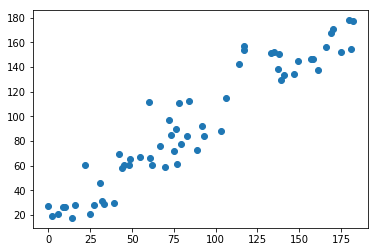

In [228]:
plt.scatter(y_test,y_predict)